In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
# do we need anything else?

In [4]:
h = 4.136e-15 # Planck constant in eV s
kb = 8.617e-5 # Boltzmann constant in eV / K
eV_to_joules = 1.602e-19 # eV to joules conversion factor
c_ang = 3e18 # speed of light in Angstroms

def energy_in_eV(x, opt='lambda'):
    if opt == 'lambda':
        return h * c_ang / x
    elif opt == 'nu':
        return h * x

print 'Testing: h in joules:', h * eV_to_joules

lbl_ft_sz, title_ft_sz = 14, 20 # label and title font sizes

Testing: h in joules: 6.625872e-34


#### Problem 1

From the Lecture 6 notes, page 6, we can assume at low density $\left( n_e \ll 10^5 \ \textsf{cm}^{-3} \right)$ that collisional de-excitation is negligible so that the line intensity ratio $I[5755]/I[6548 + 6583]$ is (keeping in mind that $[\rm{N}II] \lambda 5755$ is a $^1 D \rightarrow ^1 S$ transition and $[\rm{N}II] \lambda 6548+6583$ are $^1 S \rightarrow ^3 P$ transitions)

$$\frac{I[5755]}{I[6548 + 6583]} = \frac{A_{^1 D, ^1 S}}{A_{^1 D, ^1 S} + A_{^3 P, ^1 D}} \frac{\Omega \left(^3 P, ^1 S \right)}{\Omega \left( ^3 P, ^1 D \right)} \frac{E \left(^3 P, ^1 D\right)}{E \left(^1 D, ^1 S\right)} \exp \left( \left( -E \left(^1 S \right) + E \left( ^1 D \right) \right) \ / \ kT \right),$$

(see pg. 210 in Draine or [here](http://www.astronomy.ohio-state.edu/~pogge/Ast871/Notes/Ionized.pdf), pg. 39, for the same equation above written slightly differently; this link comes from an OSU ISM course with superb notes.) For very high density regions in LTE, we can use eq. 18.8 from Draine:

$$\frac{I[5755]}{I[6548 + 6583]} = \frac{g_{^1 D, ^1 S} A_{^1 D, ^1 S} E\left(^1 D, ^1 S \right)}{g_{^3 P, ^1 D} A_{^3 P, ^1 D} E \left( ^3 P, ^1 D \right)} \exp \left( \left( - E \left(^1 S \right) + E \left( ^1 D \right) \right) \ / \ kT \right). $$

Alternative values of Einstein $A$ coeffiecients for forbidden lines can be found [here](https://books.google.com/books/about/The_Physics_and_Dynamics_of_Planetary_Ne.html?id=xxVkZBVIZeAC), pg. 35. I _think_ the curves below are accurate; see [here](http://pulsar.sternwarte.uni-erlangen.de/wilms/teach/ism/ismchap7.pdf) for the [OIII] line ratio as a function of temperature.

The critical density separates the low and high density regimes (see pg. 20 [here](http://www.astronomy.ohio-state.edu/~pogge/Ast871/Notes/Ionized.pdf)):

$$ n_{crit} = \frac{A_{ul}}{q_{ul}}, $$

where $A_{ul}$ is the Einstein A coefficient for the transition between upper and lower levels, and $q_{ul}$ is the de-excitation rate between upper and lower levels. 

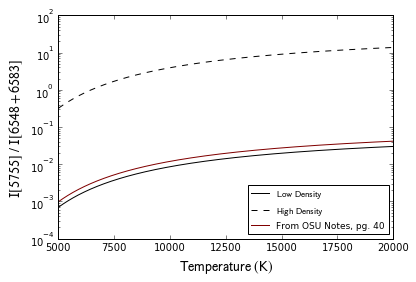

In [5]:
A_1d_1s, A_3p_1d = 1.1, 4e-3 # Einstein A coefficients
omega_3p_1s, omega_3p_1d = 0.36, 2.99 # effective collision strengths

# for the ratio of energies, we can find a weighted ratio of wavelengths - eq. from first link above, values from second link
A_1d_3p2, A_1d_3p1 = 3e-3, 1e-3
weight_wavelength = (A_1d_3p2 * 6583 + A_1d_3p1 * 6548) / (A_1d_3p2 + A_1d_3p1)
e_ratio = 5755 / weight_wavelength # invert as E \propto 1 / \lambda

temps = np.linspace(5000, 20000, 501) # temperatures in K

n2_line_ratio_small_density = (A_1d_1s / (A_1d_1s + A_3p_1d)) \
    * (omega_3p_1s / omega_3p_1d) * e_ratio * np.exp((- energy_in_eV(3063) + energy_in_eV(weight_wavelength)) / (kb * temps))

g_1d_1s, g_3p_1d = 2 * 0 + 1, 2 * 2 + 1 # degeneracies
n2_line_ratio_high_denisty = (g_1d_1s / g_3p_1d) * (A_1d_1s / A_3p_1d) * e_ratio \
    * np.exp((- energy_in_eV(3063) + energy_in_eV(weight_wavelength)) / (kb * temps))
    
# adjust LaTeX font in plots to sans-serif
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)
    
# plots
#plt.semilogy(temps, .14 * np.exp(-25e3 / temps))
plt.semilogy(temps, n2_line_ratio_small_density, color='k', label=r'$\rm{Low \ Density}$')
plt.semilogy(temps, n2_line_ratio_high_denisty, color='k', linestyle='--', label=r'$\rm{High \ Density}$')
plt.semilogy(temps, 1 / (6.91 * np.exp(25000 / temps)), color='maroon', label='From OSU Notes, pg. 40')
plt.ylabel(r'$\rm{I}[5755] \ / \ \rm{I}[6548 + 6583]$', size=lbl_ft_sz)
plt.xlabel(r'$\rm{Temperature \ (K)}$', size=lbl_ft_sz)
plt.xlim(5000, 20000)
plt.xticks(np.linspace(5000, 20000, 7))
plt.legend(loc='best', fontsize=9, numpoints=1)
plt.show()

In [6]:
# N_crit = A_2_1 / q_2_1
g_1d_3p = 5
omega_1d_3p = 2.99
A_1d_3p = 4e-3
q_1d_3p = 8.629e-8 * omega_1d_3p / g_1d_3p

g_1s_3p = 1
omega_1s_3p = 0.36
A_1s_3p = 1.1
q_1s_3p = 8.629e-8 * omega_1s_3p / g_1s_3p

def n_crit(A, q):
    return A/q

print 'Critical density for 3P transition:', '%.3e' % n_crit(A_1d_3p, q_1d_3p) 
print 'Critical density for 1D transition:', '%.3e' % n_crit(A_1s_3p, q_1s_3p)

Critical density for 3P transition: 7.752e+04
Critical density for 1D transition: 3.541e+07


From ${}^3P$ to higher levels: N_crit = 7.7e+4 $cm^{-3}$

From ${}^1D$ to higher levels: N_crit = 3.5e+7 $cm^{-3}$

#### Problem 2

Relevant formulae/tables are in the Lecture 8 notes. For a Gaussian profile, we can assume the lines are optically thick so that 

$$ \frac{W_{\lambda}}{\lambda} = \frac{\lambda}{c} \int_{-\infty}^{\infty} d\nu \ \left[ 1 - \exp \left( - \tau_0 \ \exp \left(x^2 \right) \right) \right] \\ = \frac{2 \lambda}{c} \Delta \nu_D \int_{-\infty}^{\infty} d\nu \ \left[ 1 - \exp \left( - \tau_0 \ \exp \left(x^2 \right) \right) \right] \\ = \frac{2 b}{c} F\left(\tau_0\right),$$

following the convention on pg. 5 of the notes. 

/home/michael/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:38: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.8703108504398673

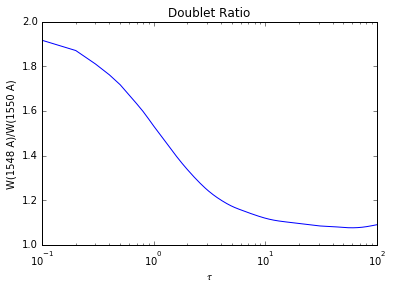

In [7]:
# For part a, assume the doppler parameter is constant for both. We also know that T_0 depends on the
# upward oscillator strength, thus T_2 = 2 * T_1.

from scipy.interpolate import interp1d

lambda_1 = 1548
lambda_2 = 1550

T_1 = [0, 0.10, 0.20, 0.30, 
           0.40, 0.50, 0.60, 0.80, 
           1.0, 1.2, 1.4, 1.6, 2.0, 
           3.0, 4.0, 6.0, 10, 20, 30, 
           40, 60, 100, 1000, 10000]

F = [0.0, 0.086, 0.165, 0.240, 
        0.309, 0.374, 0.435, 0.545, 
        0.643, 0.728, 0.804, 0.872, 
        0.986, 1.188, 1.320, 1.483, 
        1.66, 1.86, 1.97, 2.04, 
        2.14, 2.26, 2.73, 3.12]

def curve_of_growth(T):
    model = interp1d(T_1, F, kind='cubic')
    return model(T)

# Interpolate the curve_of_growth.
model = curve_of_growth(T_1)

taus_list = np.linspace(0.1, 100, 1000)

plt.semilogx(taus_list, lambda_1/lambda_2 * curve_of_growth(2*taus_list)/curve_of_growth(taus_list))
plt.ylabel('W(1548 A)/W(1550 A)')
plt.xlabel(r'$\tau$')
plt.title('Doublet Ratio')

doublet_ratio = lambda_1/lambda_2 * curve_of_growth(2*taus_list)/curve_of_growth(taus_list)

doublet_ratio[1.33] # Check what Tau is for this ratio.

In [8]:
# If we are given a ratio W(1548)/W(1550), we can look
# at the graph and determine the Tau.
print 'Ratio of W(1548)/W1(1550):', 132/98.6
print 'Tau for this ratio is roughly: 1.8 - 2'

Ratio of W(1548)/W1(1550): 1.33874239351
Tau for this ratio is roughly: 1.8 - 2


In [9]:
# Find F(T)_1550.
print 'F_1550(1.87):', '%.3e' % curve_of_growth(1.87)

# Find_F(T)_1548
print 'F_1548(1.87):', '%.3e' % curve_of_growth(2*1.87)

F_1550(1.87): 9.517e-01
F_1548(1.87): 1.290e+00


In [10]:
# Find doppler parameter 'b'
import astropy.units as u
import astropy.constants as c

b_1548= (0.132/1548) * (1/1.29) * (c.c/2)
print b_1548.to(u.km/u.s)

b_1550 = (0.0986/1550) * (1/0.95) * (c.c/2)
print b_1550.to(u.km/u.s)

9.9084100655 km / s
10.0371940098 km / s


In [11]:
import astropy.units as u
import astropy.constants as c
# Find the column density, 1550
frequency = (c.c/(1550.*u.Angstrom))
oscillator_strength = 0.1
tau = 1.87
#e = 4.8e-10 # in Cgs units
#m_e = 9.109e-28 # in g
#c = 2.998e10 # Speed of light in cm/s
b_1550 = 10 * u.km / u.s


def delta_nu(b, nu):
    return (b/c.c) * nu

def column_density(b, nu, tau):
    return (tau * np.pi**(1/2) * delta_nu(b_1550, frequency)) / ((np.pi * c.e.esu**2)/(c.m_e * c.c) * oscillator_strength) 

tmp = column_density(b_1550, frequency, tau)
tmp.to(1/u.cm**2)

#print b_1550/c
#print delta_nu(b_1550, frequency)
#print (tau * m_e * c.c)/(np.pi * e**2)
#print (tau * m_e * c.c)/(np.pi * e**2) * 10 * np.sqrt(np.pi) * delta_nu(b_1550, frequency)

<Quantity 80571690705552.78 1 / cm2>

# Part C: 
Consider Case 3, optically-thick Lorentzian line. The equivalent width ratio increases as square root.

Consider graph 9.3, 9.2 in B. Draine. The line broadens for different b.

#### Problem 3

Relevant equations are on pg. 10 of the Lecture 8 notes.

In [14]:
# We assume that the stellar abundances for the materials
# are given from Table 1, lecture 2.

n_H = 100 # Problem gives cloud has 100 H/cm^3.

def rel_H(x):
    # Relative abundance to hydrogen (which is defined as 12).
    return 10**(x - 12)

c_ab = rel_H(8.39)
si_ab = rel_H(7.51)
fe_ab = rel_H(7.45)
s_ab = rel_H(7.14)
mg_ab = rel_H(7.53)
ca_ab = rel_H(6.31)

# Assuming logarithmic solar depletion factors from table 2.12:

c_de = 10**(-0.47)
si_de = 10**(-1.31)
mg_de = 10**(-0.81)
s_de = 10**(0.23)
fe_de = 10**(-2.39)

# Finding Ca abundnace.
N_ca = n_H * ca_ab
print 'Ca Number Density:', '%.3e' % N_ca

# Return electron abundance.
def e_a(ab, de):
    return ab * de

# Total electron abundance (tea): arising from C, Si, Fe, S, Mg.
tea = e_a(c_ab, c_de) + e_a(si_ab, si_de) + e_a(fe_ab, fe_de) + e_a(s_ab, s_de) + e_a(mg_ab, mg_de)
print 'Total electron abundance:', '%.3e' % tea

# Calculate number density of electrons.
n_e = tea * n_H
print 'Electron Number Density:', '%.3e' % n_e

# Ionization and recombination rates for Ca, Ca+
Ca_ion = 2.8e-10
Ca_plus_ion = 0.018e-10
Ca_rec = 2e-11
Ca_plus_rec = 5e-11

N_Ca_plus = (Ca_ion * N_ca) / (Ca_rec * n_e)
print 'Ca+ Number Density:', '%.3e' % N_Ca_plus

N_Ca_plus_plus = (Ca_plus_ion * N_ca) / (Ca_plus_rec * n_e)
print 'Ca++ Number Density:', '%.3e' % N_Ca_plus_plus


Ca Number Density: 2.042e-04
Total electron abundance: 1.136e-04
Electron Number Density: 1.136e-02
Ca+ Number Density: 2.517e-01
Ca++ Number Density: 6.472e-04
